# First look at the processCcd output

## Displaying the calibrated exposure

In [1]:
#import the python package related to the butler
import lsst.daf.persistence as dafPersist

# create a butler object associated to the output directory
butler = dafPersist.Butler("/sps/lsst/dev/boutigny/demo/output")

In [2]:
# get the calibrated exposure from the butler
# We first create a dataid dictionary containing the minimal set of informations for the butler to retrieve the file
dataid = {'visit': 40984, 'ccd': 55}

# get the exposure - immediate=True means that the file is immediately read and loaded in memory
#                    immediate=False : the file is read and loaded at first access
calexp = butler.get('calexp', dataid, immediate=True)
calexp

In [3]:
%matplotlib notebook
import lsst.display.matplotlib
import lsst.afw.display as afwDisplay

# RHL trick to display images in matplotlib
afwDisplay.setDefaultBackend("matplotlib")

In [4]:
# an exposure has 3 layers: image, mask and variance
# let's get the image layer
im = calexp.getMaskedImage().getImage()

<IPython.core.display.Javascript object>


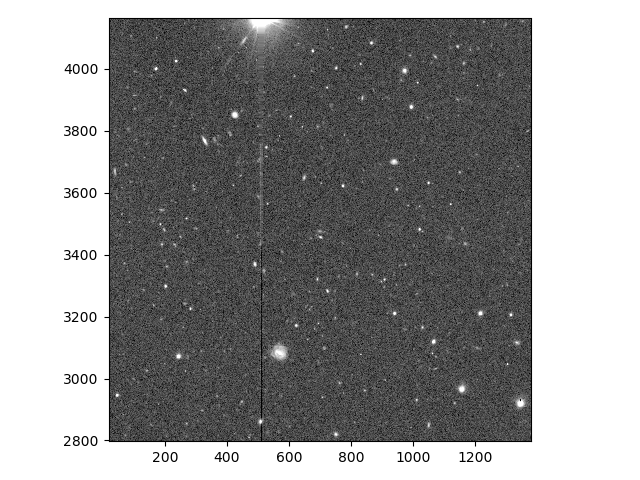

In [30]:
display = afwDisplay.Display(0)
display.setImage(im)
display.scale(algorithm='asinh', min='zscale', Q=3)
display.mtv(im)
display.zoom(3, 700, 3480)

<IPython.core.display.Javascript object>


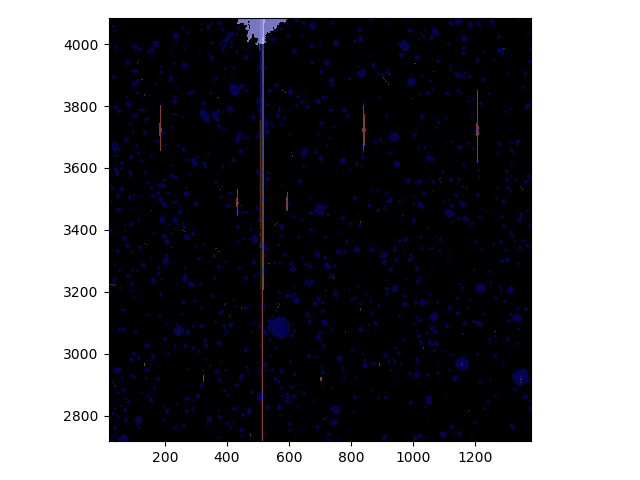

In [29]:
# display the mask layer
mask = calexp.getMaskedImage().getMask()
display = afwDisplay.Display(1)
display.setImage(mask)
display.mtv(mask)
display.zoom(3, 700, 3480)

<IPython.core.display.Javascript object>


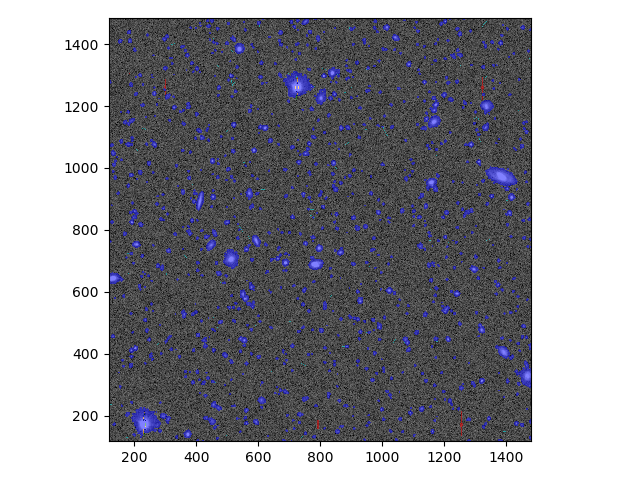

In [32]:
# one can also display the image and the mask layers all together
display = afwDisplay.Display(2)
display.setImage(calexp)
display.scale(algorithm='asinh', min='zscale', Q=3)
# need some tranparency to see the image ! 
display.setMaskTransparency(50)
display.mtv(calexp)
display.zoom(3, 800, 800)

## Look at the source catalog